In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'nutritional-values-for-common-foods-and-products:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F235864%2F501830%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240915%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240915T060001Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da475b8160cfb9422ff8372c1e01569545d06672245a5f845d1bc123a1f89539cbe9ca363689084c6d134be238cd55273df8f237510b8e7f65ab669ac4aecda17f3ef5f5f467fc927bf1daaaf2d43be5091ea674b9fe4be9d2fe454c159f886eaf7c490b20fa0c51efa1951577892cecb20dcf0575574be7e5add7b727badd0c33a0d7faef0ea62376d143fe4c12b441fe45e6593d892887c1b5fd1e017fc5ace9978a1513f457ef98e7f001861a66e296ba9321db76a32a650fad28c077df508c5132a784d5613c02f0fb20b27798a7221fd51d6e9b63b55ead18c15f1b0327579f62453c49ddbe36b8f25e889d85e9937bde5ff1d5d2f8b6baf57152868f989'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1336803 bytes downloaded
Downloaded and uncompressed: nutritional-values-for-common-foods-and-products
Data source import complete.


<font face="times new roman" size="3" color="black">
    <div align="center">
        <h1>Hacia la alfabetización nutrimental mexicana: una investigación mediante Ciencia de Datos</h1>
            <h3>Autor: Gregorio Pantoja Guzmán</h3>
            <h6>Profesor: Saúl Juárez Ordóñez (sauljz@tec.mx)<br>Tecnológico de Monterrey, Escuela de Ingeniería y Ciencias, Departamento de Ciencias<br>Av. Carlos Lazo 100, Santa Fe, 01389, Ciudad de México, México</h6>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>Resumen</h3>
            <h3>El presente trabajo realiza una investigación a fondo de la situación nutricional en México. En la primera parte del reporte se definen lo que son los nutrientes de los alimentos. Después, se habla del etiquetado nutricional de comidas y bebidas, así como sus críticas y reformas. Se informa sobre las enfermedades derivadas del consumo en exceso de calorías y del panorama actual en México. Por último, se menciona cómo la Ciencia de Datos funge como un recurso vital para alfabetizar a la población nutricionalmente. En la segunda parte del reporte, se muestra el análisis de un conjunto de datos de más de 8000 comidas para llegar, finalmente, a un modelo de regresión lineal múltiple que predice la cantidad de calorías que contiene un alimento. Se finaliza con las conclusiones sobre el modelo y el futuro de la nutrición mexicana.</h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>Palabras clave:</i>&nbsp; Ciencia de datos,&nbsp; Alfabetización nutrimental,&nbsp; Obesidad,&nbsp; Diabetes,&nbsp; Modelo de regresión,&nbsp; Etiquetado nutrimental.</h3>
    </div>
</font>

***
<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>1. Introducción</h3>
            <h3>&emsp;El panorama nutrimental de México se encuentra en crisis. Un país en donde el porcentaje de la población con enfermedades crónicas derivadas de la alimentación se encuentra en aumento cada año. Esta situación plantea una pregunta fundamental: ¿Por qué los esfuerzos por mitigar esta problemática no han dado resultado?
</h3>
            <h3>&emsp;Diversas investigaciones llegaron a la conclusión que el problema podría encontrarse en la forma en que la información nutrimental es presentada al consumidor. Sin embargo, existe un factor todavía más importante. Se necesita educar a la población en materia de salud y nutrición para que la población, eventualmente, tome decisiones más críticas y mejor informadas.
</h3>
            <h3>&emsp;Es por ello que debemos buscar herramientas que nos permitan divulgar la forma en que la cantidad de calorías que consumimos puede afectar nuestra salud. El objetivo de este reporte es mostrar cómo mediante una de esas herramientas, la Ciencia de Datos, puede ayudarnos a crear un ambiente propicio hacia una alfabetización nutrimental de la población. A través de un modelo de regresión lineal que nos permita calcular las calorías de un alimento, podemos dar pauta hacia un mundo de posibilidades en las que se concientice la forma en que consumimos.
</h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>2. Marco Teórico</h3>
            <h3>&emsp;Para fines de la investigación, es necesario definir las variables de estudio, además de explicar el contexto actual del etiquetado de los alimentos en México con base en su información nutricional. También, se explica el panorama de las enfermedades crónicas derivadas del consumo en exceso de calorías. Finalmente, se muestra como el uso de la Ciencia de Datos puede ayudar a alcanzar la Alfabetización nutrimental, esto mediante un modelo de regresión lineal.
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>2.1 Información nutrimental</i></h3>
        <h3>&emsp;A lo largo del presente reporte, se utilizarán términos relacionados con los nutrientes contenidos en los alimentos, mismos que serán las variables de estudio para nuestra investigación.
        </h3>
        <h3>&emsp;Las calorías son una unidad de medida de la energía. Los alimentos que consumimos contienen calorías, es decir, nos aportan energía que es utilizada para realizar todas las funciones metabólicas del organismo. Esta energía puede ser utilizada en el momento o se puede almacenar en forma de hidratos de carbono o como grasa para su uso posterior. (Youdim, 2019)
</h3>
        <h3>&emsp;La ingesta de calorías recomendada por día varía dependiendo de diversos factores, tales como el sexo, la edad, la actividad física, las enfermedades o el peso de cada persona. No obstante, se recomienda seguir una ingesta en promedio de 2000 kcal al día. La Tabla 2.1.1 muestra las calorías diarias necesarias para mantener el peso corporal normal según el grupo de edad: </h3>
<table>
    <caption style="font-size:130%"><b>Tabla 2.1.1: Ingesta diaria de calorias por grupo de edad (Youdim, 2019)</b></caption>
        <tr>
             <th style="font-size:140%">
                 Grupo de edad
             </th>
             <th style="font-size:140%">
                 Ingesta diaria de calorías recomendadas
             </th>
         </tr>
         <tr>
             <td style="font-size:140%">
                 Para los niños pequeños
             </td>
             <td style="font-size:140%">
                 1000 a 1800 kcal
            </td>
        </tr>
        <tr>
            <td style="font-size:140%">
                Para los niños mayores y los adolescentes
            </td>
            <td style="font-size:140%">
                1200 a 3200 kcal
            </td>
        </tr>
        <tr>
            <td style="font-size:140%">
                Para los adultos
            </td>
            <td style="font-size:140%">
                1600 a 3000 kcal
            </td>
        </tr>
</table>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;Por otro lado, tenemos los hidratos de carbono, mejor conocidos como carbohidratos. Corresponden a uno de los tres principales macronutrientes necesarios para nuestra nutrición. Son los primeros en ser transformados en energía por el organismo.
        </h3>
        <h3>&emsp;Dichas moléculas se descomponen en azúcares y se dividen en dos tipos: carbohidratos simples, como la glucosa y la sacarosa; y carbohidratos complejos, como almidones y fibras. Los azúcares simples son la fuente más rápida de energía; mientras que los complejos aportan energía más lentamente. Expertos recomiendan que los carbohidratos constituyan del 50 al 55% de la ingesta diaria de calorías, de los cuales, menos del 10% deben provenir de azúcares añadidos. (Youdim, 2019)
        </h3>
        <h3>&emsp;Las proteínas son macromoléculas constituidas por largas cadenas de aminoácidos, sus unidades fundamentales. Dado que el organismo necesita más tiempo para descomponerlos, son una fuente más lenta, pero duradera, de energía que los hidratos de carbono.
        </h3>
        <h3>&emsp;Existen 20 aminoácidos, de los cuales 8 de ellos son considerados aminoácidos esenciales, ya que el organismo no puede sintetizarlos naturalmente. Las proteínas son necesarias para mantener y reponer los tejidos. Normalmente, no se utilizan para obtener energía, sino para la constitución de las células que forman los tejidos en todo el cuerpo. En general, un adulto necesita consumir del 10 al 15% del total de calorías en forma de proteínas. (Youdim, 2019)
        </h3>
        <h3>&emsp;El último macronutriente lo constituyen las grasas. Son moléculas complejas compuestas de glicerol y ácidos grasos. Son de gran importancia ya que ayudan al crecimiento y a la obtención de energía. También, se utilizan para sintetizar sustancias importantes para las actividades del cuerpo, como las hormonas. Son las fuente más lenta de energía, pero la más eficiente. Existen 3 tipos de grasas: monoinsaturadas, poliinsaturadas y saturadas. Según expertos, las grasas se deben limitar al 28% de la ingesta diaria de calorías. (Youdim, 2019)
        </h3>
        <h3>&emsp;Los alimentos también contienen nutrientes esenciales como son las vitaminas (vitaminas A, C, D, E y del complejo B, por mencionar algunas) y los minerales (hierro, potasio, calcio, magnesio, entre otros). Para propósitos de esta investigación, nos enfocaremos en uno de esos minerales: el sodio. El sodio es un macromineral y uno de los electrolitos fundamentales, principalmente para el funcionamiento de músculos y nervios. Además, ayuda a mantener el equilibrio hídrico y homeostático del cuerpo. (Lewis, 2020)
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>2.1.1 Etiquetado nutrimental</i></h3>
        <h3>&emsp;El etiquetado nutrimental se entiende como la “descripción destinada a informar al consumidor sobre las propiedades nutrimentales de un alimento, lo cual se encuentra en los empaques o envases de alimentos y bebidas”. (Martínez, 2018) Es una herramienta eficaz para mostrar a los consumidores la cantidad y porcentaje de nutrientes que contienen dichos alimentos.
        </h3>
        <h3>La declaración nutrimental tiene dos funciones principales: (Martínez, 2018)</h3>
        <h3><ul>
            <li>Primero, especificar e informar acerca de los valores nutricionales y energéticos del alimento; desde grasas, carbohidratos y proteínas, hasta vitaminas y minerales;</li>
            <li>Segundo, proporcionar información nutricional complementaria para mejorar la comprensión del consumidor en cuanto a tamaño de porción e ingredientes.</li>
        </ul></h3>
        <h3>&emsp;Dichas etiquetas pueden variar dependiendo del país y/o del producto, no obstante, podemos destacar algunos datos importantes a considerar: (U.S. Food and Drug Administration, 2020)</h3>
        <h3><ol>
            <li>Tamaño de la porción: en la parte superior de la etiqueta, podemos ver el tamaño por cada porción de alimento, así como la cantidad de porciones totales por envase. Este dato es primordial para poder establecer la cantidad de nutrientes ingeridos dependiendo de la cantidad de porciones que se consumen. Se expresa en gramos, mililitros, piezas o medidas caseras (cucharadas, tazas, etc.).</li>
            <li>Cantidad de calorías: debajo del tamaño de la porción, se indica la cantidad de calorías que se adquieren al ingerir una porción de ese producto y, además, la cantidad de calorías por envase.</li>
            <li>Nutrimentos: después, aparece un listado de los principales nutrientes necesarios para nuestra dieta diaria. Entre ellos veremos la cantidad de proteínas, carbohidratos, grasas y algunas vitaminas y/o minerales que nos aporta cada porción del producto. La FDA recomienda consumir en menor cantidad las grasas saturadas, el sodio y las azúcares añadidas.</li>
            <li>Porcentaje de valor diario (%DV) / Valores nutrimentales de referencia (%VNR): en el etiquetado estadounidense, se muestra el porcentaje de valor diario para cada uno de los nutrientes contenidos en el producto. La FDA indica que un %DV menor a 5% es considerado como un bajo valor de ese nutriente y uno mayor a 10% es considerado alto. En el etiquetado mexicano, encontraremos el porcentaje de valor nutrimental de referencia predefinido para la dieta de la población mexicana.</li>
        </ol></h3>
        <h3>&emsp;La etiqueta de declaración nutrimental en México presenta la siguiente información:</h3>
        <h3><ul>
            <li>Tamaño de la porción / Porciones por envase</li>
            <li>Contenido energético por envase</li>
            <li>Contenido energético por porción (100 g)</li>
            <li>Proteínas</li>
            <li>Grasas totales (Saturadas y trans)</li>
            <li>Hidratos de carbono</li>
            <li>Azúcares</li>
            <li>Azúcares añadidos</li>
            <li>Fibra dietética</li>
            <li>Sodio</li>
            <li>%VNR (Valores Nutrimentales de Referencia para la Población Mexicana)</li>
        </ul></h3>
            <img src="https://esha.com/wp-content/uploads/2020/11/MX-standard.png" width="300">
        <h4>Figura 2.1.1: Etiqueta de “Declaración Nutrimental” estándar en México a partir de 2020. (Referida de ESHA Research)
        </h4>
        <img src="https://esha.com/wp-content/uploads/2014/09/label-US-standard-01-1.png" width="200">
        <h4>Figurar 2.1.2: Etiqueta de “Nutrition Facts” estándar de Estados Unidos a partir de 2016. (Referida de ESHA Research)
        </h4>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>2.2 Enfermedades derivadas de un consumo en exceso de calorías</i></h3>
        <h3>&emsp;Tener una alimentación saludable, balanceada y equilibrada permite mantenernos con un buen estado de salud y bienestar. Sin embargo, cuando empezamos a tener deficiencias, excesos o un desequilibrio en nuestra ingesta calórica, puede llegar a ser contraproducente. A esto se refiere la malnutrición.
        </h3>
        <h3>&emsp;La malnutrición se puede dar de 3 diferentes maneras: por desnutrición, por malnutrición relacionada con los micronutrientes y por enfermedades relacionadas con la alimentación. Dentro de este último grupo se encuentran las enfermedades no transmisibles (como la diabetes y algunos cánceres), la obesidad y el sobrepeso. (OMS, 2021)
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>2.2.1 Obesidad y Diabetes</i></h3>
        <h3>&emsp;Se entiende por diabetes mellitus al “trastorno en el que el organismo no produce suficiente cantidad de insulina o no responde normalmente a la misma, lo que provoca que las concentraciones de azúcar (glucosa) en sangre sean anormalmente elevadas”. (Brutsaert, 2020) Existen 3 tipos de diabetes, a decir, la prediabetes, la diabetes tipo 1 y la tipo 2.
        </h3>
        <h3>&emsp;En general, las personas diabéticas presentan los siguientes síntomas en común: aumento de la sed, aumento de la micción, aumento del hambre, visión borrosa, somnolencia, náuseas y disminución de la resistencia durante el ejercicio. Entre el tratamiento que se puede seguir para disminuir los efectos de la diabetes se encuentra: tener una dieta sana y equilibrada, hacer ejercicio, perder peso y, en ocasiones, inyecciones de insulina. (Brutsaert, 2020)
        </h3>
        <h3>&emsp;Otra enfermedad crónica es la obesidad la cual se puede definir como el exceso de peso corporal. La obesidad puede surgir de diversos factores, como la alimentación, los genes, la actividad física, el estilo de vida, los antecedentes socioeconómicos, etc.; los cuales, al final, se traducen en la ingesta de más calorías de las que el organismo necesita. (Youdim, 2020)
        </h3>
        <h3>&emsp;La diferencia entre el sobrepeso y la obesidad está relacionada con el Índice de Masa Corporal (IMC) de la persona, el cual se calcula como el peso (kg) dividido entre la estatura (m) al cuadrado. La Tabla 2.2.2 muestra los intervalos del IMC para categorizar el sobrepeso u obesidad de una persona: (Youdim, 2020)
        </h3>
<table width="500">
    <caption style="font-size:130%"><b>Tabla 2.2.1: Categorías de sobrepeso y obesidad según el rango de IMC</b></caption>
        <tr>
             <th style="font-size:140%">
                 Categoría
             </th>
             <th style="font-size:140%">
                 Rango de IMC
             </th>
         </tr>
         <tr>
             <td style="font-size:140%">
                 Sobrepeso
             </td>
             <td style="font-size:140%">
                 25 ⩽ IMC ⩽ 29,9
            </td>
        </tr>
        <tr>
            <td style="font-size:140%">
                Obesidad
            </td>
            <td style="font-size:140%">
                30 ⩽ IMC ⩽ 39,9
            </td>
        </tr>
        <tr>
            <td style="font-size:140%">
                Obesidad grave
            </td>
            <td style="font-size:140%">
                40 ⩽ IMC
            </td>
        </tr>
</table>
        <h3>&emsp;La obesidad puede ser tratada llevando una dieta diversa y balanceada, aumentando la cantidad de actividad física, cambiando los malos hábitos (como el sedentarismo o el consumo de comida procesada), mediante fármacos para reducir de peso o con una cirugía bariátrica. (Youdim, 2020)
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>2.2.2 Panorama actual en México</i></h3>
        <h3>&emsp;En 2016, México declaró una emergencia epidemiológica debido a los altos índices de obesidad y de enfermedades no transmisibles derivados de la alimentación. (White & Barquera, 2020) Esto pone al país en una situación crítica en la cual los problemas por las enfermedades relacionadas con la nutrición de los mexicanos crecen cada día más. El contexto actual en los índices de nutrición y salud de nuestro país son desalentadores.
        </h3>
        <h3>&emsp;La Secretaría de Salud, el Instituto Nacional de Salud Pública (INSP) y el Instituto Nacional de Estadística y Geografía (INEGI) realizaron durante 2018 y 2019 la Encuesta Nacional de Salud y Nutrición (ENSANUT) 2018. La encuesta buscó conocer las condiciones de salud y nutrición de la población, así como de enfermedades como anemia, obesidad y desnutrición relacionadas con la alimentación de las y los mexicanos.
        </h3>
        <h3>&emsp;Resulta preocupante los datos obtenidos de la encuesta en materia de obesidad y sobrepeso. En 2018, 35.6% de la población entre 5 a 11 años presentaban obesidad (18.1%) y sobrepeso (17.5%). Mientras que en la población de 12 a 19 años se tiene que el 38.4% tienen obesidad (14.6%) y sobrepeso (23.8%). En los adultos de 20 años o más, los datos son aún más alarmantes, ya que se estima que ambas enfermedades afectan al 75.2% de dicho grupo de edad (39.1% sobrepeso y 36.1% obesidad). (INEGI et al., 2019)
        </h3>
        <h3>&emsp;Los datos del ENSANUT 2018-19 indican que la prevalencia de ambas enfermedades sigue aumentando en el país. Aunado a esto, estudios recientes han hecho saber que México necesita implementar rápidamente un mejor ambiente alimentario en el que se fomente una alimentación sana, balanceada, equilibrada y moderada. Por ejemplo, se han realizado acciones como la implementación de impuestos a las bebidas azucaradas, el cual ha contribuido a reducir el consumo de dichas bebidas. (Barquera et al., 2020) No obstante, esto no ha sido suficiente para lograr un cambio significativo en los hábitos alimenticios de las personas.
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>2.2.3 Etiquetado de advertencia en México</i></h3>
        <h3>&emsp;A raíz de diversas investigaciones y estudios, se llevó a cabo una nueva medida dirigida, esta vez, al etiquetado de los alimentos y bebidas. En octubre de 2019, México adoptó el uso del etiquetado de advertencia frontal en sustitución de las guías diarias de alimentación, conocidas como GDA. Las especificaciones quedaron registradas en la Norma Oficial Mexicana NOM-051-SCFI/SSA1-2010 con entrada en vigor el 1º de octubre de 2020. (INSP, 2019)
        </h3>
        <h3>&emsp;La nueva ley se basa en varios artículos publicados por el Centro de Investigación en Nutrición y Salud Pública del Instituto Nacional de Salud Pública. Por ejemplo, en el artículo “Conocimiento y uso del etiquetado nutrimental de alimentos y bebidas industrializados en México” se informa que el 44.1% de la población no lee las etiquetas nutrimentales y el 66.4% no las usa al momento de elegir sus alimentos. Además, más del 90% de la población no conoce con exactitud el rango de calorías que debe consumir al día. (Torrentino-Mayo et al., 2018)
        </h3>
        <h3>&emsp;El mismo estudio indica que la población rural y de zonas menos desarrolladas de México, las personas con una menor educación y los adultos mayores son los grupos más afectados por la falta de comprensión acerca del uso del etiquetado anterior. (Torrentino-Mayo et al., 2018) Es por ello que se planteó la necesidad de implementar un etiquetado que facilite su comprensión y entendimiento para todos los sectores socioeconómicos del país. El modelo sugerido fue el del etiquetado de octágonos.
        </h3>
        <h3>&emsp;Bajo la nueva ley, todos los alimentos y bebidas manufacturados deberán incluir una etiqueta de advertencia en forma de octágonos con fondo negro en aquellos productos que contengan altas cantidades de calorías, azúcares, sodio, grasas saturadas y grasas trans. También, se incluye un etiquetado especial para los productos que contengan cafeína y para los que contengan edulcorantes, en los cuales se añade la leyenda “Evitar en niños” o “No recomendable en niños”. (White & Barquera, 2020)
        </h3>
        <img src="https://www.insp.mx/resources/images/stories/2021/imgs/20210312_sellos.png" width="700">
        <h4>Figura 2.3.1: Nuevo etiquetado de advertencia en México compuesto por 5 sellos de advertencia y 2 leyendas precautorias. (Referida del Instituto Nacional de Salud Pública)</h4>
        <h3>&emsp;Igualmente, la nueva ley señala que los productos que contengan uno o más sellos de advertencia y estén destinados hacia un público infantil, no podrán incluir en sus empaques personajes infantiles, mascotas, dibujos animados, celebridades, que estén dirigidos hacia los niños y que promuevan el consumo de estos productos. (INSP, 2019)
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>2.3 Ciencia de Datos para la toma de decisiones alimenticias</i></h3>
        <h3>&emsp;Como se ha presentado a lo largo del presente, las cifras de la situación alimentaria en México son realmente preocupantes. Aunque una parte del problema pueda provenir de la falta de interés y conocimiento de la información nutrimental de los alimentos, también influye el factor del consumo de alimentos procesados y con un bajo nivel nutrimental. Estudios han demostrado que el consumo de productos industrializados va en aumento y se estima que más del 58% del total de calorías consumidas por los mexicanos proviene de alimentos procesados. (Tolentino-Mayo, 2018)
        </h3>
        <h3>&emsp;Es aquí donde el papel de la Ciencia de Datos cobra relevancia, ya que será la plataforma a través de la cual los consumidores podrán tomar decisiones alimenticias más responsables y a consciencia. A partir de modelos predictivos, se informa a los consumidores sobre el contenido calórico de lo que ingiere y esto da cabida a la educación alimentaria y, por ende, a la alfabetización nutrimental.
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>2.3.1 Alfabetización nutrimental</i></h3>
        <h3>&emsp;Según la Red de Información, Comunicación y Educación Alimentaria y Nutricional para América Latina y el Caribe (2011), la Educación Alimentaria y Nutricional se trata de las estrategias educativas que facilitan la adopción propia de conductas alimentarias y demás comportamientos que se relacionan con la alimentación y la nutrición propicios para la salud y el bienestar. El conjunto de estrategias tienen como objetivo el desarrollo de habilidades de cada persona para tomar decisiones adecuadas en cuanto a su alimentación y la promoción de un ambiente alimentario sano y propicio.
        </h3>
        <h3>&emsp;Como parte de una ética nutricional, es necesario que las políticas públicas del gobierno y colectivas de la sociedad se enfoquen en propiciar más espacios de información acerca de la correcta alimentación que los ciudadanos deben tener. Por tanto, cuando logremos educar a la población en materia de nutrición y alimentación podremos estar seguros que las decisiones finales de los consumidores se volverán más críticas. Entonces, habremos logrado el cambio hacia una alfabetización nutrimental para la población.
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>2.3.1 Modelos de regresión lineal</i></h3>
        <h3>&emsp;Finalmente, con la ayuda de la Ciencia de Datos, será posible alcanzar la alfabetización y educación nutricional para una mejor toma de decisiones en torno a la salud de las personas y en base a una selección de alimentos nutritivos y balanceados.
        </h3>
        <h3>&emsp;Dentro del campo de la Ciencia de Datos, existe el análisis de regresión. Este es un proceso estadístico que facilita el análisis de la relación entre dos o más variables, de las cuales una de ellas es dependiente del resto. Un análisis regresivo permite comprender cómo las variables independientes afectan directamente a otra variable que dependa de ellas. (Software DELSOL, 2020)
        </h3>
        <h3>&emsp;Según la cantidad de variables podemos distinguir dos tipos de modelos de regresión (Minitab, 2019):
        </h3>
        <h3><ul>
            <li>La regresión lineal simple examina la relación lineal entre dos variables continuas: una respuesta (Y) y un predictor (X). El modelo matemático es de la forma: $$Y = aX + b$$
            </li>
            <li>La regresión lineal múltiple examina las relaciones lineales entre una respuesta continua y dos o más predictores. El modelo matemático queda de la forma: $$Y = a_1X_1 + a_2X_2 + … + a_nX_n + b$$
            </li>
        </ul></h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>3. Análisis y resultados</h3>
            <h3>&emsp;La propuesta de esta investigación es crear un modelo matemático de regresión múltiple a partir de un conjunto de datos de comidas con su información nutrimental. A partir del conjunto, podremos analizar e interpretar las variables de estudio para encontrar correlaciones entre ellas. Se analizarán los estadísticos y se graficaran las variables para observar su comportamiento. Finalmente, terminaremos con la aplicación y verificación del modelo predictivo. </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;El lenguaje de programación a trabajar será Python con ayuda de varias de sus librerías enfocadas en la Ciencia de Datos y el análisis de datos. Primero, comenzamos por importar y asignar los nombres a las librerías a utilizar:</h3>
    </div>
</font>

In [3]:
# Importamos las librerías para el análisis y graficación de los datos
import pandas as pd
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;El conjunto de datos a utilizar fue obtenido y descargado de <a>https://www.kaggle.com</a>. Leeremos el contenido del archivo .csv y guardaremos los datos dentro de un dataframe de Pandas.</h3>
    </div>
</font>

In [5]:
import pandas as pd

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Leer el archivo CSV
df = pd.read_csv("../input/nutritional-values-for-common-foods-and-products/nutrition.csv")

# Mostrar el DataFrame
print(df)


      Unnamed: 0                                               name  \
0              0                                         Cornstarch   
1              1                                       Nuts, pecans   
2              2                                      Eggplant, raw   
3              3                                     Teff, uncooked   
4              4                                    Sherbet, orange   
...          ...                                                ...   
8784        8784  Beef, raw, all grades, trimmed to 0" fat, sepa...   
8785        8785  Lamb, cooked, separable lean only, composite o...   
8786        8786  Lamb, raw, separable lean and fat, composite o...   
8787        8787  Beef, raw, all grades, trimmed to 0" fat, sepa...   
8788        8788  Beef, raw, all grades, trimmed to 0" fat, sepa...   

     serving_size  calories total_fat saturated_fat cholesterol    sodium  \
0           100 g       381      0.1g           NaN           0   9.00

In [6]:
# Muestra la forma del dataframe en formato (filas, columnas)
df.shape

(8789, 77)

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>3.1 Exploración de los datos</i></h3>
        <h3>&emsp;El dataframe inicial contiene 8789 comidas (filas) con 77 propiedades (columnas) entre las que destacan el nombre de cada comida, el tamaño de porción, las calorías y demás información nutrimental de cada alimento. Crearemos una muestra aleatoria del conjunto de datos y tenemos lo siguiente
        </h3>
    </div>
</font>

In [7]:
# Se crea una muestra con 3 elementos del df principal
df.sample(3)

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
4769,4769,"Beef, fast fried, cooked, knuckle, imported, N...",100 g,178,7.6g,2.3g,76mg,49.00 mg,0,0,0,3.229 mg,0.359 mg,0.090 mg,0.058 mg,45.00 IU,13.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,1.88 mcg,0.319 mg,0.0 mg,4.00 IU,0.38 mg,0.38 mg,0,5.00 mg,0.093 mg,2.25 mg,26.00 mg,0.008 mg,232.00 mg,405.00 mg,1.8 mcg,4.66 mg,27.51 g,1.432 g,1.810 g,0,0,3.837 g,1.498 g,0.991 g,0,1.144 g,2.076 g,2.178 g,0.905 g,1.070 g,0.883 g,0.967 g,0.996 g,0.288 g,0.926 g,1.214 g,0.00 g,0.0 g,0.00 g,0,0,0,0,0,0,7.58 g,2.299 g,2.353 g,0.337 g,76.00 mg,0.0 g,1.25 g,0.00 mg,0.00 mg,64.70 g
5217,5217,"Chicken, breast meat and skin, BBQ, rotisserie...",100 g,175,7.7g,2g,90mg,329.00 mg,57.1 mg,11.00 mcg,0.00 mcg,9.303 mg,0.111 mg,0.139 mg,0.078 mg,37.00 IU,11.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.30 mcg,0.307 mg,0.0 mg,0.00 IU,0.33 mg,0.33 mg,0.0 mcg,16.00 mg,0.041 mg,0.51 mg,25.00 mg,0.004 mg,244.00 mg,276.00 mg,22.3 mcg,0.86 mg,26.37 g,1.308 g,1.646 g,1.550 g,0.276 g,2.935 g,1.204 g,0.948 g,0.059 g,1.113 g,2.138 g,2.533 g,0.770 g,1.034 g,1.048 g,0.862 g,0.629 g,0.272 g,0.861 g,1.165 g,0.09 g,0.0 g,0.09 g,0.03 g,0.00 g,0.03 g,0.00 g,0.00 g,0.03 g,7.67 g,1.958 g,3.131 g,0.945 g,90.00 mg,0.0 g,1.42 g,0.00 mg,0.00 mg,65.19 g
8370,8370,"Beef, grilled, cooked, all grades, trimmed to ...",100 g,271,19g,8.4g,78mg,58.00 mg,0,6.00 mcg,0.00 mcg,5.149 mg,0,0.301 mg,0.074 mg,25.00 IU,7.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,2.20 mcg,0.500 mg,0.0 mg,6.00 IU,0,0,1.6 mcg,12.00 mg,0.085 mg,2.40 mg,23.00 mg,0,163.00 mg,279.00 mg,31.8 mcg,6.34 mg,24.85 g,1.541 g,1.692 g,2.421 g,0.253 g,4.063 g,1.223 g,0.931 g,0.170 g,1.157 g,2.142 g,2.380 g,0.672 g,0.997 g,1.115 g,1.023 g,1.171 g,0.278 g,0.926 g,1.242 g,0.00 g,0.0 g,0.00 g,0,0,0,0,0,0,19.02 g,8.443 g,9.171 g,0.896 g,78.00 mg,0.0 g,0.99 g,0.00 mg,0.00 mg,55.59 g


<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;Notamos que nuestro dataframe contiene mucha información nutrimental la cual, aunque es importante conocer, no nos resulta útil para próposito de esta investigación. Además, notamos que, a excepción de las calorías, las demás variables nutrimentales muestran sus unidades junto a la cantidad de nutrientes. Esto resultará en un problema al momento de estudiar nuestros datos. Como veremos a continuación, Python reconoce a la mayor parte de las variables como tipo "object" y solo a las calorías como un entero.
        </h3>
    </div>
</font>

In [8]:
# Muestra el tipo de datos para contenido en cada columna del df
df.dtypes

,0
Unnamed: 0,int64
name,object
serving_size,object
calories,int64
total_fat,object
...,...
alcohol,object
ash,object
caffeine,object
theobromine,object


<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;Por ello, es necesario que las variables que usemos sean de tipo numérico y no categórico para, de esta forma, poder interpretar correctamente los datos, obtener gráficos y encontrar los valores de estadística descriptiva. Entonces, procederemos a acotar nuestro conjunto de datos a las 5 variables de interés: calorías, proteínas, carbohidratos, grasas totales y sodio.
        </h3>
        <h3>&emsp;Con el nuevo conjunto de datos creado, suprimiremos las unidades en gramos o miligramos en las variables de tipo categóricas y las convertiremos a tipo flotante. No hay que olvidar que todas las variables indepedientes deben estar en las mismas unidades. Dado que el sodio está medido en miligramos, lo pasaremos a unidades de gramos para no alterar el modelo matemático.
        </h3>
    </div>
</font>

In [9]:
# Nuevo conjunto de datos con las variables de estudio
df_sub = df.loc[ : , ['name', 'calories', 'protein', 'carbohydrate','total_fat','sodium']]

# Quitamos unidades, cambiamos a tipo float y ponemos todo en las mismas unidades
df_sub['protein'] = df_sub['protein'].str.rstrip('g').astype('float')
df_sub['carbohydrate'] = df_sub['carbohydrate'].str.rstrip('g').astype('float')
df_sub['total_fat'] = df_sub['total_fat'].str.rstrip('g').astype('float')
df_sub['sodium'] = df_sub['sodium'].str.rstrip('mg').astype('float')/1000

df_sub # Se muestra el nuevo dataframe

,name,calories,protein,carbohydrate,total_fat,sodium
0,Cornstarch,381,0.26,91.27,0.1,0.009
1,"Nuts, pecans",691,9.17,13.86,72.0,0.000
2,"Eggplant, raw",25,0.98,5.88,0.2,0.002
3,"Teff, uncooked",367,13.30,73.13,2.4,0.012
4,"Sherbet, orange",144,1.10,30.40,2.0,0.046
...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,23.45,0.00,3.5,0.054
8785,"Lamb, cooked, separable lean only, composite o...",206,29.59,0.00,8.9,0.050
8786,"Lamb, raw, separable lean and fat, composite o...",277,16.74,0.00,23.0,0.039
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",121,23.37,0.00,3.0,0.053


In [10]:
# Mostramos el tipo de datos del nuevo df
df_sub.dtypes

,0
name,object
calories,int64
protein,float64
carbohydrate,float64
total_fat,float64
sodium,float64


<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;Ahora, tenemos un nuevo conjunto de datos filtrado y preparado para ser analizado. Como pudimos observar previamente, ahora todas las variables son de tipo flotante lo cual facilitará el cálculo e interpretación numérico.
        </h3>
        <h3>&emsp;La librería de Pandas ofrece una herramienta vital para el análisis de datos. Nos referimos a la librería de Pandas Profiling, la cual permite crear reportes de perfilamiento para un conjunto de datos de tipo pandas.DataFrame. Importaremos dicha librería y crearemos un reporte de perfilamiento para observar como se distribuyen los datos.
        </h3>
    </div>
</font>

In [11]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=30c7f0960a8a888c629c95af91942db5a76cf91d0c7912aa8e39d17c52414cc4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [12]:
# Se importa la librería de pandas_profiling
import pandas as pd
from ydata_profiling import ProfileReport
# Se crea el reporte de perfilamiento de los datos
profile = ProfileReport(df_sub, title="Reporte de Perfilamiento", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;Gracias a nuestro reporte de perfilamiento, podemos notar ya algunos datos importantes en cuanto a la correlación entre las variables. Podemos confirmar esta correlación mediante el siguiente código:
        </h3>
    </div>
</font>

In [13]:
# Verificar el tipo de datos en cada columna
print("Tipos de datos en el DataFrame:")
print(df_sub.dtypes)

# Seleccionar solo columnas numéricas
df_numeric = df_sub.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr = df_numeric.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr)

Tipos de datos en el DataFrame:
name             object
calories          int64
protein         float64
carbohydrate    float64
total_fat       float64
sodium          float64
dtype: object
Matriz de correlación:
              calories   protein  carbohydrate  total_fat    sodium
calories      1.000000  0.112888      0.492915   0.806574  0.055405
protein       0.112888  1.000000     -0.303971   0.062268 -0.001647
carbohydrate  0.492915 -0.303971      1.000000  -0.048740  0.073100
total_fat     0.806574  0.062268     -0.048740   1.000000  0.011999
sodium        0.055405 -0.001647      0.073100   0.011999  1.000000


<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;De manera visual, en la figura 3.1.1 se observa un mapa de calor con los valores de las correlaciones entre las variables de estudio:
            <ul><li>Vemos que la correlación más alta de nuestras variables es la relación entre grasas totales y las calorías. Su coeficiente de correlación es de +0.80 lo que significa que mantiene una correlación fuertemente proporcional. Esto nos indica que entre más grasas totales tenga un alimento, es muy probable que la cantidad de calorías aumente.</li>
            <li>Por otro lado, la segunda correlación más alta de nuestras variables es la relación entre carbohidratos y calorías. Su coeficiente de correlación es de +0.49. Quiere decir que mantiene una correlación medianamente proporcional Por tanto, entre más carbohidratos tenga un alimento, la cantidad de calorías aumentará, pero su aportación no será considerable como lo sería si aumentaran las grasas totales.</li>
            <li>Por último, la correlación inversa más alta de nuestras variables es la relación entre carbohidratos y proteínas. Su coeficiente de correlación es de -0.30 lo que indica que mantiene una correlación débil e inversamente proporcional. Es decir, cuando aumenta la cantidad de carbohidratos, la cantidad de proteínas tiende a disminuir; y viceversa.</li></ul>
        </h3>
        <h3>&emsp;Estas conclusiones serán importantes durante el análisis de nuestro conjunto de datos.</h3>
    </div>
</font>

Text(0.5, 1.0, 'Figura 3.1.1: Mapa de calor de las correlaciones entre las variables')

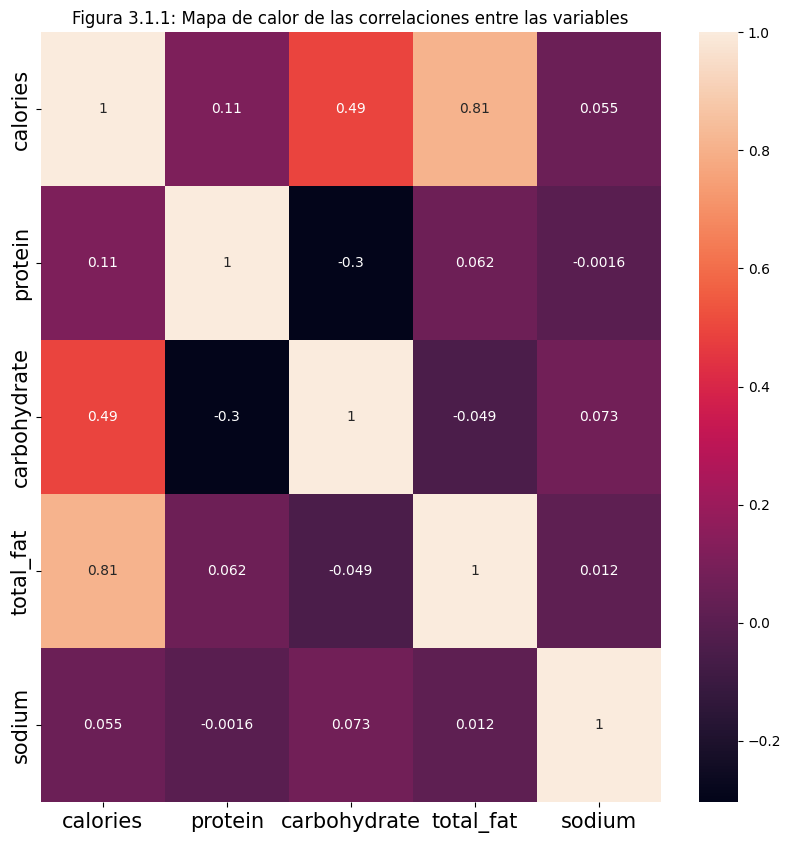

In [14]:
#Crea un área de 10x10 para el gráfico
fig, ax = plt.subplots(figsize=(10,10))
# Extraemos los datos de la tabla corrr. Y anotamos los numéros dentro de cada cuadro.
ax = sns.heatmap(data = corr, annot = True)

# Designamos el tamaño de fuente y la alineación del texto.
plt.xticks(fontsize = 15, ha = 'center')
plt.yticks(fontsize = 15, va = 'center')

# Añadimos título de la gráfica.
ax.set_title('Figura 3.1.1: Mapa de calor de las correlaciones entre las variables')

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>3.2 Estadística descriptiva</i></h3>
        <h3>&emsp;Después del análisis introductorio de nuestro conjunto de datos y ya que hemos acotado el dataframe a las 5 variables de estudio, podemos comenzar por observar los estadísticos descriptivos más importantes del conjunto de datos. Para ello, usamos la siguiente linea de código para describir el dataframe:
        </h3>
    </div>
</font>

In [15]:
df_sub.describe()

,calories,protein,carbohydrate,total_fat,sodium
count,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,226.283878,11.345616,22.121915,10.556855,0.306354
std,169.862001,10.530602,27.266261,15.818247,0.939220
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,2.380000,0.050000,1.000000,0.036000
50%,191.000000,8.020000,9.340000,5.100000,0.084000
75%,337.000000,19.880000,34.910000,14.000000,0.396000
max,902.000000,88.320000,100.000000,100.000000,38.758000


<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;Los estadísticos descritos anteriormente nos dan un aproximado de cómo se comportan nuestras variables. Observamos los valores máximos, mínimos, los tres cuartiles, la media y la desviación estándar. Sin embargo, en el reporte de perfilamiento hecho anteriormente, notamos que existe un porcentaje elevado de valores de ceros en las 5 variables. Por ello, puede que el modelo final esté sesgado por estos datos nulos.
        </h3>
        <h3>&emsp;Dicho esto, procederemos a crear un nuevo dataframe pero sustrayendo todos los valores que sean iguales a cero, de forma que el modelo matemática y análisis de las gráficas sea más transparente.
        </h3>
    </div>
</font>

In [16]:
# Nuevo dataframe sin valores de cero
# Sustraemos todos los datos de cada variable que sean diferentes de cero
df_0 = df_sub.loc[(df_sub['calories'] != 0) & (df_sub['sodium'] != 0) & (df_sub['protein'] != 0)
                  & (df_sub['carbohydrate'] != 0) & (df_sub['total_fat'] != 0)]

# Al usar la función loc, aparece una columna con el índice de cada elemento;
# usamos drop para quitar dicha columna.
df_0.reset_index(inplace = True, drop = True)
df_0

,name,calories,protein,carbohydrate,total_fat,sodium
0,Cornstarch,381,0.26,91.27,0.1,0.009
1,"Eggplant, raw",25,0.98,5.88,0.2,0.002
2,"Teff, uncooked",367,13.30,73.13,2.4,0.012
3,"Sherbet, orange",144,1.10,30.40,2.0,0.046
4,"Cauliflower, raw",25,1.92,4.97,0.3,0.030
...,...,...,...,...,...,...
6016,"Apple juice, with added ascorbic acid, diluted...",47,0.14,11.54,0.1,0.007
6017,"Toddler formula, ready-to-feed, ENFAGROW PREMI...",64,1.78,7.18,3.6,0.025
6018,"Infant formula, with ARA and DHA, SENSITIVE (L...",68,1.48,7.40,3.7,0.021
6019,"Infant formula, not reconstituted, liquid conc...",128,3.20,14.10,6.5,0.046


In [17]:
# Obtenemos los nuevos estadísticos descriptivos del dataframe
df_0.describe()

,calories,protein,carbohydrate,total_fat,sodium
count,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000
mean,233.352267,8.328788,29.897862,9.561385,0.376740
std,165.749852,8.206847,27.641460,12.627994,0.864409
min,1.000000,0.010000,0.010000,0.100000,0.001000
25%,79.000000,2.320000,6.700000,0.800000,0.036000
50%,213.000000,5.800000,18.820000,4.300000,0.249000
75%,367.000000,11.850000,55.380000,14.000000,0.512000
max,878.000000,88.320000,99.100000,99.000000,26.050000


<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>3.2.1 Histogramas de las variables</i></h3>
        <h3>&emsp;Con el nuevo dataframe definido, comenzaremos por observar la distribución de los datos mediante histogramas para cada una de las variables. Esto a partir del siguiente código:
        </h3>
    </div>
</font>

<ipython-input-18-26e678e66042>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['calories'], hist_kws = {'edgecolor' : 'black'},
<ipython-input-18-26e678e66042>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['protein'], hist_kws = {'edgecolor' : 'black'},
<ipython-input-18-26e678e66

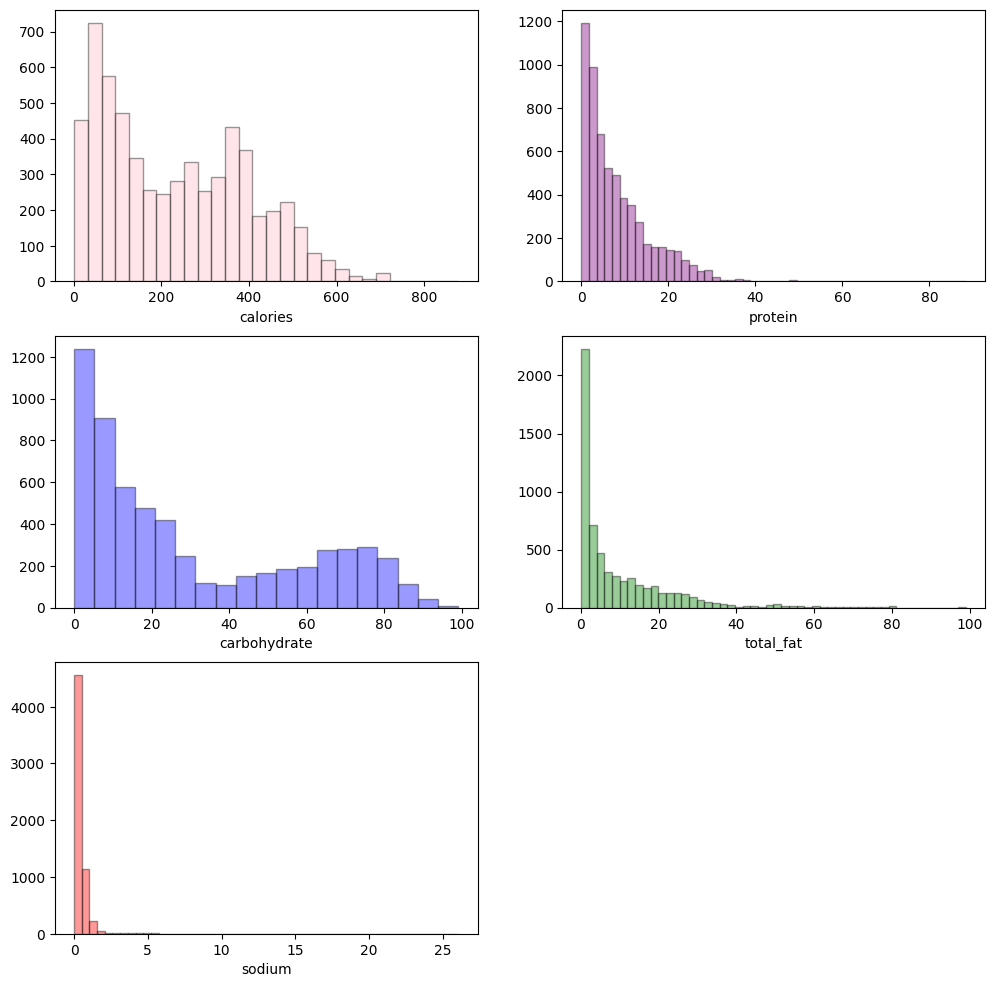

In [18]:
# Creamos un espacio de 3x2 para colocar las 5 gráficas juntas
fig, ax = plt.subplots(3, 2, figsize=(12,12))

# Instrucciones para crear los histogramas para las variables:
# calories, protein, carbohydrate, total_fat y sodium.
sns.distplot(df_0['calories'], hist_kws = {'edgecolor' : 'black'},
             kde = False, color = 'pink', ax = ax[0,0])
sns.distplot(df_0['protein'], hist_kws = {'edgecolor' : 'black'},
             kde = False, color = 'purple', ax = ax[0,1])
sns.distplot(df_0['carbohydrate'], hist_kws = {'edgecolor' : 'black'},
             kde = False, color = 'blue', ax = ax[1,0])
sns.distplot(df_0['total_fat'], hist_kws = {'edgecolor' : 'black'},
             kde = False, color = 'green', ax = ax[1,1])
sns.distplot(df_0['sodium'], hist_kws = {'edgecolor' : 'black'},
             kde = False, color = 'red', ax = ax[2,0])

# Eliminamos el espacio sobrante.
fig.delaxes(ax[2,1])

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;Para el caso de las calorías, observamos que la mayor parte de las comidas del conjunto de datos tienen una distribución de calorías entre las 0 y 400 calorías. De los estadísticos descriptivos sabemos que la mediana se encuentra en las 213 kcal. Por lo que tiene sentido que las calorías estén distribuidas más a la izquierda. Además, podemos ver que existen muy pocas comidas con altas calorías. El pico más alto se encuentra en los alimentos con aproximadamente 50 kcal, con un poco más de 700 observaciones.</h3>
        <h3>&emsp;El caso se repite para las proteínas y grasas totales. Vemos una distribución muy alta en los primeros 20 g de ambas variables. Mientras que son escasos los alimentos que sobrepasan los 40 g de cada uno de estos nutrientes. En las proteínas, casi 1200 alimentos tienen menos de 2 g de este macronutriente. En las grasas, más de 2000 comidas tienen igualmente valores de grasa muy bajos.</h3>
        <h3>&emsp;Los carbohidratos presentan una distribución peculiar. Al igual que las tres variables anteriores, la mayor parte de comidas se concentra en valores menores a 30 g de carbohidratos. Luego entre los 30 y 50 g tenemos un desplome de cantidad de alimentos, pero sube de nuevo un poco en los 70 g de carbohidratos. Es decir, una gran cantidad de alimentos se concentran como bajas en carbohidratos, pero en mediana proporción, tenemos alimentos con altos carbohidratos.</h3>
        <h3>&emsp;Finalmente, tenemos el histograma de sodio. En la cual se observa que casi 4500 observacione corresponden a alimentos con menos de 1 g de sodio. Esto tiene sentido considerando que normalmente el sodio se mide en miligramos y no rebasa los 1000 mg. Después baja estrepitosamente la cantidad de comidas con mayor cantidad de sal a lo largo de la gráfica.</h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>3.2.2 Gráficos de cajas y bigotes de las variables</i></h3>
        <h3>&emsp;Otra forma de visualizar los datos y los estadísticos descriptivos es mediante gráficos de cajas y bigotes, o boxplots en inglés. A continuación se presentan los boxplots para las 5 variables de estudio:
        </h3>
    </div>
</font>

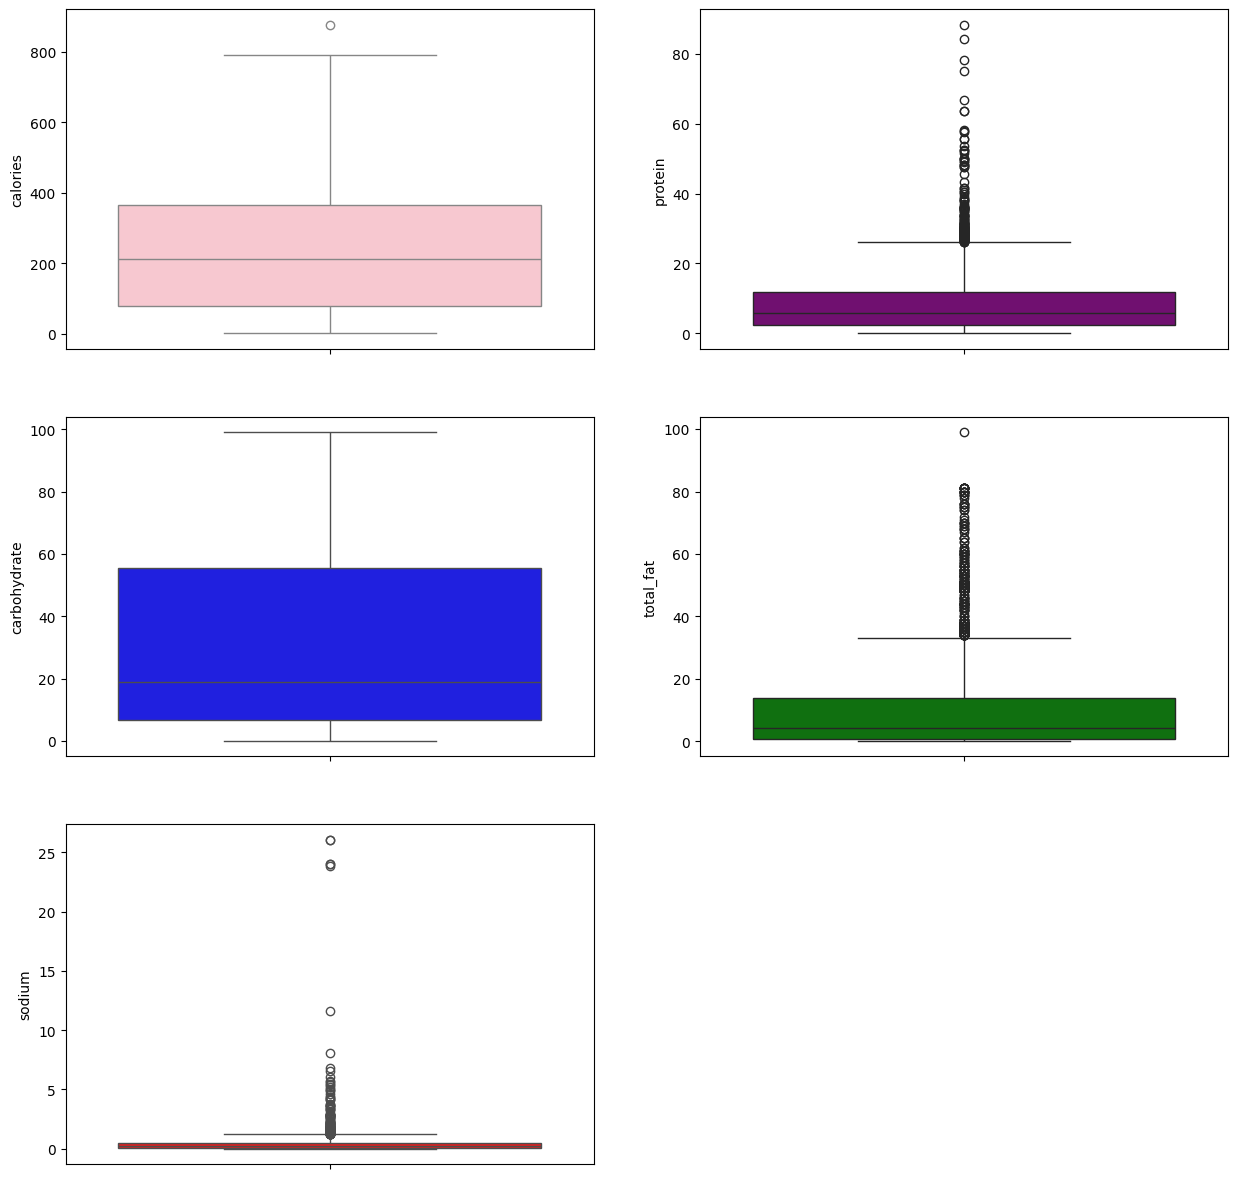

In [19]:
# Creamos el espacio de 3x2 para colocar las boxplots
fig, ax = plt.subplots(3, 2, figsize=(15,15))

# Creamos una box plot para cada variable de estudio
sns.boxplot(df_0['calories'], color = 'pink', ax = ax[0,0])
sns.boxplot(df_0['protein'], color = 'purple', ax = ax[0,1])
sns.boxplot(df_0['carbohydrate'], color = 'blue', ax = ax[1,0])
sns.boxplot(df_0['total_fat'], color = 'green', ax = ax[1,1])
sns.boxplot(df_0['sodium'], color = 'red', ax = ax[2,0])

# Suprimimos el espacio sobrante.
fig.delaxes(ax[2,1])

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;Mediante las boxplots, podemos ser capaces de apreciar de forma más visual la forma en que los datos se distribuyen en cada cuartil. Algo interesante por destacar es que las gráficas de proteínas, grasas totales y sodio, muestran una gran cantidad de valores extremos, o outliers en inglés. Es decir, estás comidas sobrepasan el rango intercuatilíco de cada gráfico. Es posible quitar dichos outliers y mostrar las gráficas de forma más uniforme mediante el siguiente código:</h3>
    </div>
</font>

In [20]:
# La función quartile(q) da como resultado un valor límite que indica que
# el q% de todos los valores se encuentra por debajo de ese valor límite.
q1 = df_0["calories"].quantile(0.99)
q2 = df_0["protein"].quantile(0.88)
q3 = df_0["carbohydrate"].quantile(0.99)
q4 = df_0["total_fat"].quantile(0.9)
q5 = df_0["sodium"].quantile(0.94)

df_filtro = df_0[(df_0["calories"] < q1) & (df_0["protein"] < q2) & (df_0["carbohydrate"] < q3)
               & (df_0["total_fat"] < q4) & (df_0["sodium"] < q5)]

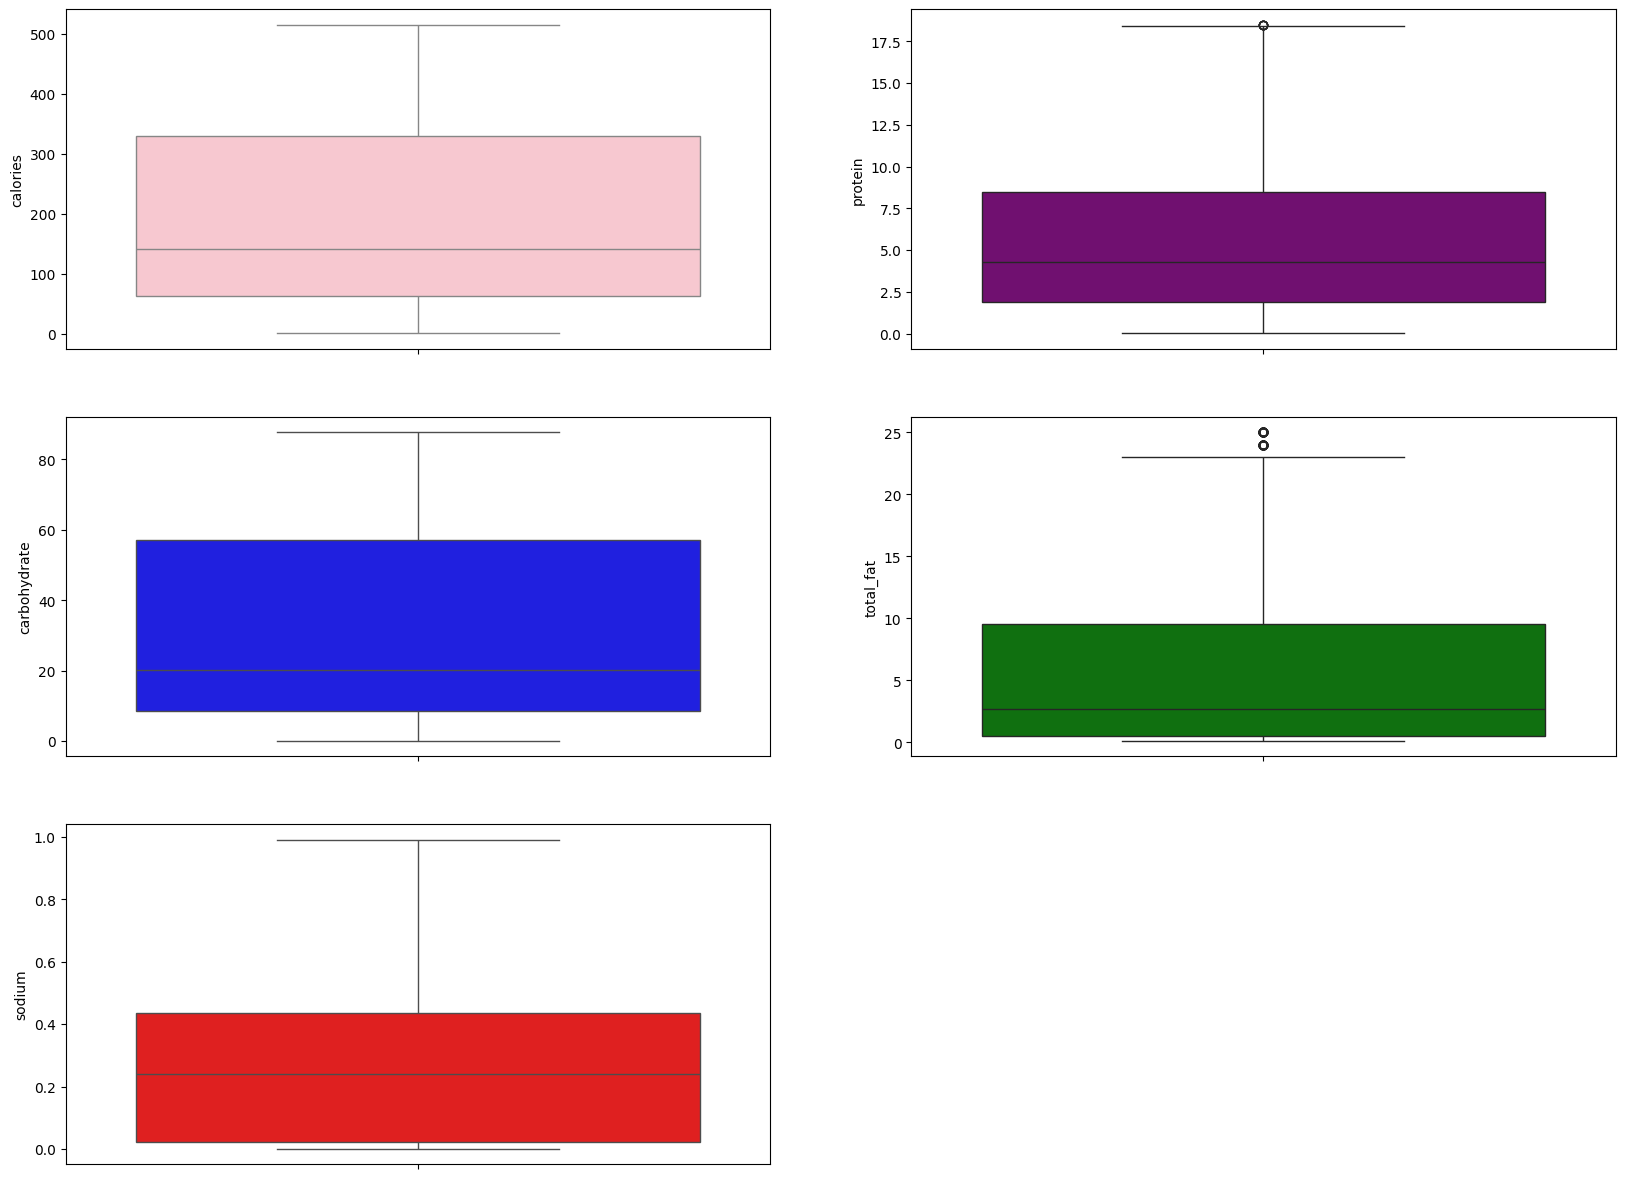

In [23]:
# Creamos el espacio de 3x2 para colocar las nuevas boxplots
fig, ax = plt.subplots(3, 2, figsize=(20,15))

# Creamos una box plot para cada variable de estudio
sns.boxplot(df_filtro['calories'], color = 'pink', ax = ax[0,0])
sns.boxplot(df_filtro['protein'], color = 'purple', ax = ax[0,1])
sns.boxplot(df_filtro['carbohydrate'], color = 'blue', ax = ax[1,0])
sns.boxplot(df_filtro['total_fat'], color = 'green', ax = ax[1,1])
sns.boxplot(df_filtro['sodium'], color = 'red', ax = ax[2,0])

# Suprimimos el espacio sobrante.
fig.delaxes(ax[2,1])

In [22]:
# Estadísticos descriptivos del conjunto de datos sin outliers
df_filtro.describe()

,calories,protein,carbohydrate,total_fat,sodium
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,194.623756,5.586357,31.345486,5.769100,0.265412
std,148.099464,4.549743,27.232991,6.781884,0.252784
min,1.000000,0.010000,0.010000,0.100000,0.001000
25%,63.000000,1.870000,8.420000,0.500000,0.023000
50%,142.000000,4.300000,20.100000,2.700000,0.239000
75%,330.000000,8.500000,57.100000,9.500000,0.434000
max,515.000000,18.500000,87.730000,25.000000,0.990000


<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;De esta manera, tenemos boxplots que son más precisos al no considerar los outliers. Sin embargo, para el análisis del modelo matématico usaremos el conjunto de datos incluyendo los valores extremos, puesto que si removemos muchos datos del conjunto de datos original, podremos perder información y correlaciones importantes.</h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>3.3 Modelo Matemático</i></h3>
        <h3>&emsp;Ya que contamos con los datos filtrados y listos para usar, procedemos a encontrar un modelo matemático que nos permita relacionar las 4 variables dependientes (proteínas, carbohidratos, grasas totales y sodio) para predecir la cantidad de calorías que pueda tener cualquier alimento.
        </h3>
    </div>
</font>

In [24]:
# Importamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

In [25]:
# Definimos las 4 varaibles independientes en X
X = df_0[['protein','carbohydrate','total_fat','sodium']]
# Definimos la variable dependiente de y
y = df_0['calories']

In [26]:
# Ajusta un modelo de regresión lineal múltiple para X e y
model = LinearRegression().fit(X,y)

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;En esta primera parte, logramos ajustar el modelo de regresión lineal entre las variables dependientes e independientes. Ahora, procederemos a dividir el dataframe en un conjunto de datos de entrenamiento y otro de prueba del modelo.
        </h3>
    </div>
</font>

In [27]:
# Importamos la función train_test_split para crear un modelo de aprendizaje supervisado
from sklearn.model_selection import train_test_split

In [28]:
# test_size separa el conjunto en 2 partes según el porcentaje, en este caso 20%-80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
# Tenemos 4816 comidas para el conjunto de entrenamiento y 1205 comidas para el conjunto de prueba de las 6021 totales.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4816, 4), (1205, 4), (4816,), (1205,))

In [30]:
# El modelo matemático queda preparado después de entrenarlo
mod = LinearRegression()
mod.fit(X_train, y_train)

LinearRegression()

In [31]:
mod.coef_

array([3.80748209, 3.84272669, 8.81690568, 1.8333883 ])

In [32]:
mod.intercept_

1.8079162664464832

In [33]:
# Función para las predicciones

y_hat = mod.predict(X_test)

y_hat, y_hat.shape

(array([ 89.65454619,  93.04880222, 232.75340852, ...,  47.5805541 ,
         25.59877303, 136.94228401]),
 (1205,))

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>3.3.1 Función matemática del modelo</i></h3>
        <h3>&emsp;Finalmente, hemos obtenido un modelo matemático de regresión lineal múltiple que predice las calorías de cualquier comida a partir de sus proteínas, carbohidratos, grasas y sodio. Después de aplicar la función de entrenamiento y prueba, el modelo matemático quedó de la siguiente forma: </h3>
        <h3>$$f(x_1,x_2,x_3,x_4)=3.80748209x_1+3.84272669x_2+8.81690568x_3+1.8333883x_4+1.8079162$$

donde $f=$ calorías, $x_1=$ protein, $x_2=$ carbohydrate, $x_3=$ total_fat y $x_4=$ sodium.
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>&emsp;Ahora, mediante el coeficiente de determinación ajustado (R cuadrado ajustado) podremos saber que tan exacto y preciso es nuestro modelo para calcular las calorías. Entre más cercano sea el valor a 1, mejores predicciones realiza el modelo.
        </h3>
    </div>
</font>

In [34]:
# Evaluamos el modelo con el coeficiente de determinación ajustado

# Importamos el coeficiente de determinación (no ajustado)
from sklearn.metrics import r2_score

# Coeficiente de determinación aplicado al conjunto de prueba
r2 = r2_score(y_test, y_hat)

# Coeficiente de determinación ajustado
r2_adj = 1 - (1 - (r2 * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1))

r2_adj

0.9963242940894194

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>3.3.2 Validación del modelo</i></h3>
        <h3>&emsp; Finalmente, agregaremos algunos valores nutrimentales de varios alimentos para corroborar los valores de las calorías según el modelo que encontramos. Para ello, haremos tres validaciones diferentes:
        </h3>
    </div>
</font>

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>Primera validación del modelo</i></h3>
        <h3>&emsp;Validando el modelo con : "Beef, short loin, t-bone steak, bone-in, separable lean only, trimmed to 1/8" fat, choice, cooked, grilled".
        </h3>
        <h3>Datos recuperados de <a href="https://fdc.nal.usda.gov/fdc-app.html#/food-details/746763/nutrients">https://fdc.nal.usda.gov/fdc-app.html#/food-details/746763/nutrients</a></h3>
    </div>
</font>

In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Datos de la comida
prot = 27.3  # gramos
carb = 0     # gramos
fat = 10.5   # gramos
sod = 0.067  # gramos

# Crear un DataFrame con los nombres de columna correspondientes
data = pd.DataFrame([[prot, carb, fat, sod]], columns=['protein', 'carbohydrate', 'total_fat', 'sodium'])

# Hacer la predicción
prediction = mod.predict(data)
print(prediction)

[198.45252394]


<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>Segunda validación del modelo</i></h3>
        <h3>&emsp;Validando el modelo con : "Leche, de cabra (dulce). Cajeta quemada baja en calorías".
        </h3>
        <h3>Datos recuperados de: Tabla de Composición de Alimentos y Productos Alimenticios Mexicanos (versión condensada 2015), INCMNSZ (Instituto de Ciencias Médicas y Nutrición Salvador Zubirán), México. Pág. 381. <a href="https://www.incmnsz.mx/2019/TABLAS_ALIMENTOS.pdf">https://www.incmnsz.mx/2019/TABLAS_ALIMENTOS.pdf</a></h3>
    </div>
</font>

In [41]:
# Datos de la comida (dulce de leche de cabra)

# calorías reales = 324.18 kcal
prot = 5.77   # gramos
carb = 66.57  # gramos
fat = 3.84    # gramos
sod = 0.09626 # gramos

# Crear un DataFrame con los nombres de columna correspondientes
data = pd.DataFrame([[prot, carb, fat, sod]], columns=['protein', 'carbohydrate', 'total_fat', 'sodium'])

# Hacer la predicción
prediction = mod.predict(data)
print(prediction)

array([313.62080375])

<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3><i>Tercera validación del modelo</i></h3>
        <h3>&emsp;Validando el modelo con : "Chocolate Moctezuma - 250 g"
        </h3>
        <img src="https://mx.openfoodfacts.org/images/products/750/122/510/0818/nutrition_es.10.full.jpg" width="400">
        <h3>Figura 3.3.1: Etiqueta nutricional del Chocolate Moctezuma.</h3>
        <h3>Datos recuperados de: <a href="https://mx.openfoodfacts.org/producto/7501225100818/moctezuma-chocolate">https://mx.openfoodfacts.org/producto/7501225100818/moctezuma-chocolate</a></h3>
    </div>
</font>

In [42]:
# Datos de la comida (Chocolate Moctezuma)

# calorías reales = 116 kcal
prot = 2   # gramos
carb = 18  # gramos
fat = 4    # gramos
sod = 0.019 # gramos

# Crear un DataFrame con los nombres de columna correspondientes
data = pd.DataFrame([[prot, carb, fat, sod]], columns=['protein', 'carbohydrate', 'total_fat', 'sodium'])

# Hacer la predicción
prediction = mod.predict(data)
print(prediction)

[113.89441806]


***
<font face="times new roman" size="3" color="black">
    <div align="justify">
        <h3>4. Conclusiones</h3>
            <h3>&emsp;El modelo predictivo de las calorías logró cumplir con las expectativas propuestas, aunque presenta ligeras desviaciones de los valores reales de las calorías. Durante la validación del modelo, se obtuvieron valores muy cercanos entre los predichos por el modelo y los reales que van desde una diferencia de 3 kcal hasta 14 kcal. El coeficiente de determinación ajustado, arrojó que el modelo tiene un 99.63% de confiabilidad.
</h3>
            <h3>&emsp;El modelo cuenta con varias limitaciones, por ejemplo, solo se han considerado 4 variables dependientes para el cálculo de las calorías, cuando podrían agregarse otras con más valor aún. No obstante, es necesario destacar que el modelo podría ser utilizado en conjunto con programas más elaborados para crear y concientizar decisiones alimentarias mejores para la población mexicana. Este modelo da cabida a una segunda fase en la que se añada, posteriormente, un sistema personalizado de creación de dietas en base a las calorías consumidas.
</h3>
            <h3>&emsp;Finalmente, se sabe que la situación mexicana en cuanto a obesidad y diabetes no desaparecerá en pocos años. Se necesita del trabajo constante de las instituciones públicas y privadas para concientizar a la población del impacto que tienen sus decisiones alimentarias en su salud. Personalmente, creo que usando las nuevas tecnologías y la Ciencia de Datos, podremos encontrar forma de alcanzar a cada persona y lograr una alfabetización nutrimental productiva. Se espera que los resultados propuestos en esta investigación sirvan para que en un futuro, se usen como herramienta para alcanzar dicho objetivo colectivo. Para que nuestro país logré avanzar hacia un camino de salud y bienestar pleno y sano.
</h3>
    </div>
</font>